HW2 Intro to ML

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import datasets
from sklearn.datasets import load_breast_cancer


In [36]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
x = dataset.iloc[:, 0:7].values #1st 8 cols
y = dataset.iloc[:, 8].values #9th col 

In [38]:
#spliting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [39]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [40]:
#doing LogisticRegression 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [41]:
Y_pred = classifier.predict(X_test)

In [42]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[97, 10],
       [19, 28]])

In [43]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8116883116883117
Precision: 0.7368421052631579
Recall: 0.5957446808510638


Text(0.5, 257.44, 'Predicted label')

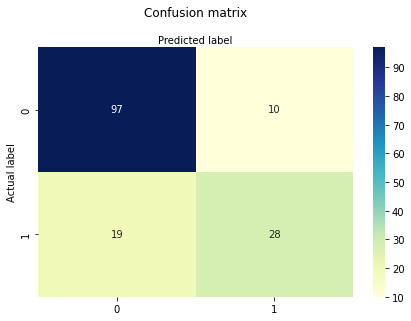

In [44]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

 K-fold cross-validation

In [45]:
# K = 5
kfold = KFold (n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression (solver='liblinear')
results = cross_val_score (model, x, y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.427% (2.782%)


In [46]:
# K = 10
kfold = KFold (n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression (solver='liblinear')
results = cross_val_score (model, x, y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.690% (3.434%)


In [47]:
# Construct a confusion matrix
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size,random_state=0)
model = LogisticRegression (solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix (Y_test, predicted) 
print(matrix)

[[98  9]
 [20 27]]


Cancer Dataset 

In [48]:
breast = load_breast_cancer()
breast_data = breast.data 
breast_data.shape

(569, 30)

In [49]:
breast_input = pd.DataFrame(breast_data) 
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels], axis = 1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names 

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, breast_labels, train_size=0.8, test_size=0.2, random_state = 0)


In [52]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better
sc_X1 = StandardScaler()
X_train = sc_X1.fit_transform(X_train)
X_test = sc_X1.transform(X_test)


In [53]:
#logistic regression
classifier = LogisticRegression(random_state=0, penalty = "none") 
classifier.fit(X_train, Y_train)


LogisticRegression(penalty='none', random_state=0)

In [54]:
Y_pred = classifier.predict(X_test)

In [55]:
#confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[45,  2],
       [ 3, 64]])

In [56]:
#matrix 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9696969696969697
Recall: 0.9552238805970149


Text(0.5, 257.44, 'Predicted label')

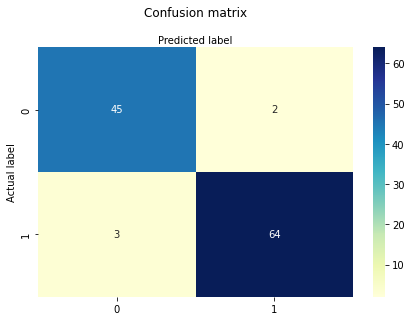

In [57]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout()
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

With penalty

In [58]:
classifier = LogisticRegression(random_state=0, penalty='l2') 
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)


In [59]:
#confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[45,  2],
       [ 2, 65]])

In [60]:
#printing 3 matrices 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

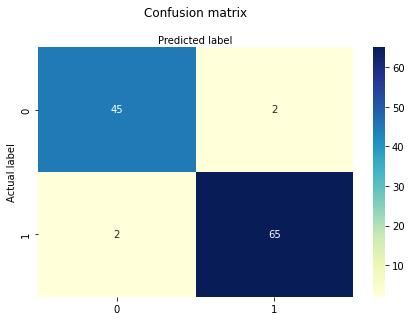

In [61]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout()
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

K folds 5 & 10

In [62]:
# k = 5
kfold = KFold (n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression (solver='liblinear')
results = cross_val_score (model, breast_input, breast_labels, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.434% (2.737%)


In [63]:
# k = 10
kfold = KFold (n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression (solver='liblinear')
results = cross_val_score (model, breast_input, breast_labels, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.432% (3.858%)


In [64]:
# Construct a confusion matrix for kfolds
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, breast_labels, train_size=0.8, test_size=0.2, random_state = 0)
#X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size,random_state=0)
model = LogisticRegression (solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix (Y_test, predicted)
print (matrix)

[[46  1]
 [ 4 63]]


In [65]:
import warnings
warnings.filterwarnings("ignore")
C= [30, 20, 10, 1, .1, .01]
for c in C:
      clf=LogisticRegression (penalty='l1', C=c, solver='liblinear') 
      clf.fit(X_train, Y_train)
      print('C:', c)
      print('Training accuracy:', clf.score (X_train, Y_train)) 
      print('Test accuracy:', clf.score (X_test, Y_test))
      print(" ")

C: 30
Training accuracy: 0.9846153846153847
Test accuracy: 0.9649122807017544
 
C: 20
Training accuracy: 0.9824175824175824
Test accuracy: 0.9649122807017544
 
C: 10
Training accuracy: 0.9758241758241758
Test accuracy: 0.9649122807017544
 
C: 1
Training accuracy: 0.9626373626373627
Test accuracy: 0.956140350877193
 
C: 0.1
Training accuracy: 0.9406593406593406
Test accuracy: 0.9385964912280702
 
C: 0.01
Training accuracy: 0.9186813186813186
Test accuracy: 0.9385964912280702
 


In [66]:
import warnings
warnings.filterwarnings("ignore")

P= [30, 20, 10, 1, .1, .01]
for c in C:
  kfold = KFold (n_splits=5, random_state=0, shuffle=True)
  clf=LogisticRegression (penalty='l1', C=c, solver='liblinear')
  results = cross_val_score (clf, breast_input, breast_labels, cv=kfold)
  #results = cross_val_score (clf, X, Y, cv=kfold)
  print('C:', c)

  print("Accuracy: %.3f%% (Std Deviation: %.3f%%)" % (results.mean()*100.0, results.std()*100.0))
  print(" ")

C: 30
Accuracy: 96.139% (Std Deviation: 1.624%)
 
C: 20
Accuracy: 96.313% (Std Deviation: 1.399%)
 
C: 10
Accuracy: 96.488% (Std Deviation: 1.661%)
 
C: 1
Accuracy: 95.259% (Std Deviation: 2.514%)
 
C: 0.1
Accuracy: 92.972% (Std Deviation: 3.232%)
 
C: 0.01
Accuracy: 92.091% (Std Deviation: 2.149%)
 
